In [14]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pylab as plt
import seaborn as sns
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score 

In [6]:
df=sm.datasets.fair.load_pandas().data
df.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.705374
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,2.203374
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.484848
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,57.599991


In [12]:
df['unfortunate']=df['affairs'].apply(lambda x: 1 if x>0 else 0)
#df['unfortunate']=(df.unfortunate>0).astype(int)
df.groupby('unfortunate',as_index=False).mean()

,unfortunate,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


In [13]:
df.groupby('rate_marriage',as_index=False).mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,unfortunate
0,1.0,33.823232,13.914141,2.308081,2.343434,13.848485,3.232323,3.838384,1.201671,0.747475
1,2.0,30.471264,10.727011,1.735632,2.330460,13.864943,3.327586,3.764368,1.615745,0.635057
2,3.0,30.008056,10.239174,1.638469,2.308157,14.001007,3.402820,3.798590,1.371281,0.550856
3,4.0,28.856601,8.816905,1.369536,2.400981,14.144514,3.420161,3.835861,0.674837,0.322926
4,5.0,28.574702,8.311662,1.252794,2.506334,14.399776,3.454918,3.892697,0.348174,0.181446


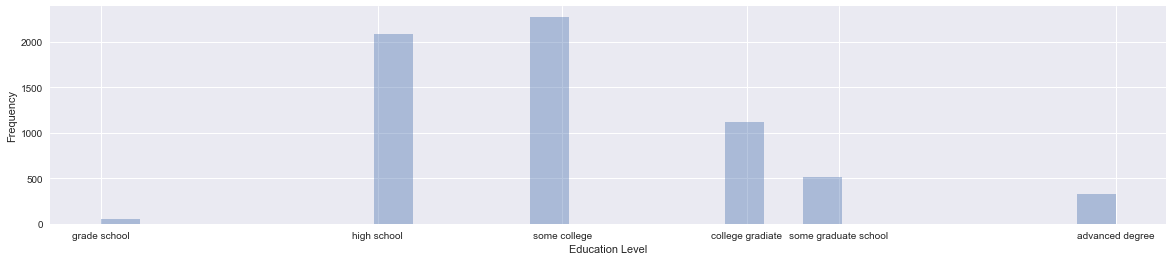

In [28]:
plt.figure(figsize=(20,4))
g=sns.distplot(df['educ'],kde=False)
g.set_xlabel('Education Level')
g.set_ylabel('Frequency')
g.set_xticks([9,12,14,16,17,20])
g.set_xticklabels(['grade school','high school','some college','college gradiate','some graduate school','advanced degree'])
sns.plt.show()


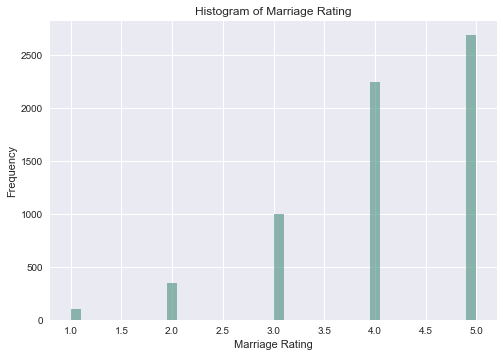

In [30]:
g=sns.distplot(df['rate_marriage'],kde=False)
plt.title('Histogram of Marriage Rating')
plt.xlabel('Marriage Rating')
plt.ylabel('Frequency')
sns.plt.show()

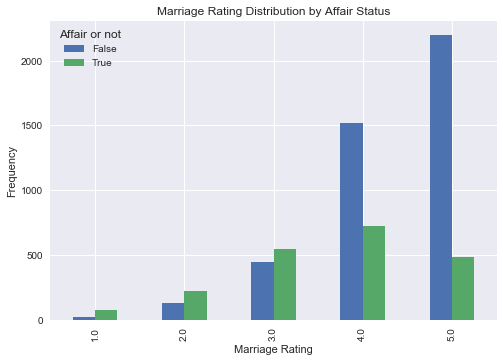

In [39]:
# barplot of marriage rating grouped by affair (True or False)
pd.crosstab(df.rate_marriage, df.unfortunate.astype(bool)).plot(kind='bar')
lg=plt.legend()
lg.set_title('Affair or not')
plt.title('Marriage Rating Distribution by Affair Status')
plt.xlabel('Marriage Rating')
plt.ylabel('Frequency')
plt.show()

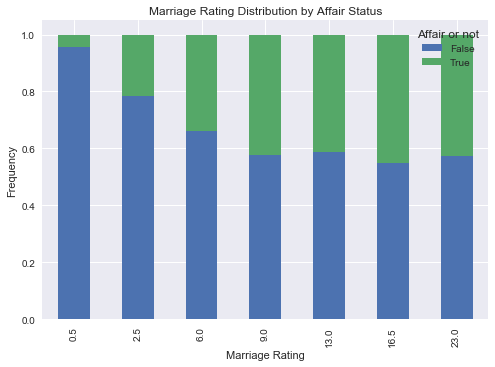

In [52]:
affair_yrs_married = pd.crosstab(df.yrs_married, df.unfortunate.astype(bool))
affair_yrs_married.div(affair_yrs_married.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
lg=plt.legend()
lg.set_title('Affair or not')
plt.title('Marriage Rating Distribution by Affair Status')
plt.xlabel('Marriage Rating')
plt.ylabel('Frequency')
plt.show()

In [53]:
df.keys()

Index([u'rate_marriage', u'age', u'yrs_married', u'children', u'religious',
       u'educ', u'occupation', u'occupation_husb', u'affairs', u'unfortunate'],
      dtype='object')

In [71]:
y, x = dmatrices('unfortunate ~ rate_marriage + age + yrs_married + children + \
                  religious + educ + C(occupation) + C(occupation_husb)',
                  df, return_type="dataframe")
x.keys()

Index([u'Intercept', u'C(occupation)[T.2.0]', u'C(occupation)[T.3.0]',
       u'C(occupation)[T.4.0]', u'C(occupation)[T.5.0]',
       u'C(occupation)[T.6.0]', u'C(occupation_husb)[T.2.0]',
       u'C(occupation_husb)[T.3.0]', u'C(occupation_husb)[T.4.0]',
       u'C(occupation_husb)[T.5.0]', u'C(occupation_husb)[T.6.0]',
       u'rate_marriage', u'age', u'yrs_married', u'children', u'religious',
       u'educ'],
      dtype='object')

In [72]:
x = x.rename(columns = {'C(occupation)[T.2.0]':'occ_2',
                        'C(occupation)[T.3.0]':'occ_3',
                        'C(occupation)[T.4.0]':'occ_4',
                        'C(occupation)[T.5.0]':'occ_5',
                        'C(occupation)[T.6.0]':'occ_6',
                        'C(occupation_husb)[T.2.0]':'occ_husb_2',
                        'C(occupation_husb)[T.3.0]':'occ_husb_3',
                        'C(occupation_husb)[T.4.0]':'occ_husb_4',
                        'C(occupation_husb)[T.5.0]':'occ_husb_5',
                        'C(occupation_husb)[T.6.0]':'occ_husb_6'})

In [73]:
print type(y)
y=np.ravel(y)
print type(y)

<class 'pandas.core.frame.DataFrame'>
<type 'numpy.ndarray'>


## Logistic Regression

In [74]:
model = LogisticRegression()
model = model.fit(x,y)
model.score(x,y)

0.72573044297832234

How about coefficients?

In [101]:
df_coef=pd.DataFrame(zip(X.columns, np.concatenate(np.transpose(model.coef_))))
df_coef.columns=['chars','coef']
#type(df_coef)
df_coef.sort_values(['coef'],ascending=False)

,chars,coef
0,Intercept,1.492616
4,C(occupation)[T.5.0],0.839101
5,C(occupation)[T.6.0],0.834203
2,C(occupation)[T.3.0],0.498419
7,C(occupation_husb)[T.3.0],0.293648
3,C(occupation)[T.4.0],0.250398
10,C(occupation_husb)[T.6.0],0.190727
6,C(occupation_husb)[T.2.0],0.188186
1,C(occupation)[T.2.0],0.186626
9,C(occupation_husb)[T.5.0],0.184908


# Model Evaluation

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model2 = LogisticRegression()
model2.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [113]:
predicted = model2.predict(X_test)
predicted

array([ 1.,  0.,  0., ...,  0.,  0.,  0.])

In [114]:

probs = model2.predict_proba(X_test)
probs

array([[ 0.3514633 ,  0.6485367 ],
       [ 0.90955083,  0.09044917],
       [ 0.72567332,  0.27432668],
       ..., 
       [ 0.55727382,  0.44272618],
       [ 0.81207047,  0.18792953],
       [ 0.747346  ,  0.252654  ]])

predict_proba(X) 

Probability estimates. <br>
The returned estimates for all classes are ordered by the label of classes.

In [115]:
print metrics.accuracy_score(y_test, predicted)
print metrics.roc_auc_score(y_test, probs[:, 1])

0.729842931937
0.745950606951


In [117]:
metrics.confusion_matrix(y_test, predicted)

array([[1169,  134],
       [ 382,  225]])

 ### confusion_matrix()  
 returns <br>
 [[true negatives, false negatives], <br>
 [true positives, false positives]]

In [118]:
print metrics.classification_report(y_test, predicted)


             precision    recall  f1-score   support

        0.0       0.75      0.90      0.82      1303
        1.0       0.63      0.37      0.47       607

avg / total       0.71      0.73      0.71      1910



##### The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives.  <br> The recall is intuitively the ability of the classifier to find all the positive samples

## Using Cross-Validation

In [119]:
scores = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
print scores
print scores.mean()

[ 0.72100313  0.70219436  0.73824451  0.70597484  0.70597484  0.72955975
  0.7327044   0.70440252  0.75157233  0.75      ]
0.724163068551
